# ETH Pedestrian Data
Walking pedestrians in busy scenarios from a bird eye view.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:

# working directory
os.chdir('C:/Users/Raphaela/Documents/MA_Studium/4_Semester/Deep Learning for Social Sciences/data/ewap_dataset_full/ewap_dataset_full/ewap_dataset/seq_eth/')

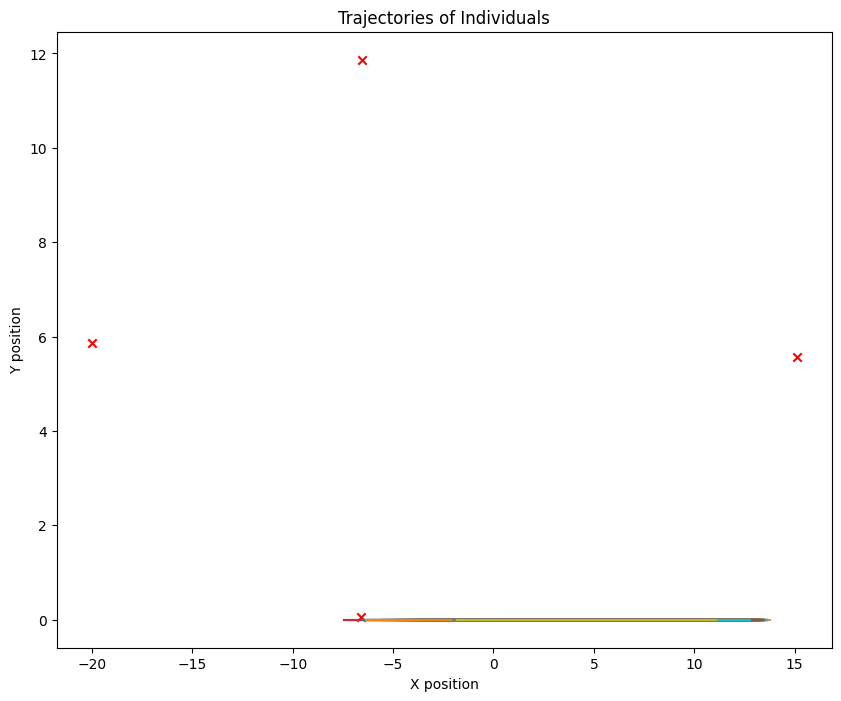

AttributeError: 'list' object has no attribute 'values'

<Figure size 1000x800 with 0 Axes>

In [11]:


# Load the data
obsmat = pd.read_csv('obsmat.txt', delim_whitespace=True, header=None)
destinations = pd.read_csv('C:/Users/Raphaela/Documents/MA_Studium/4_Semester/Deep Learning for Social Sciences/data/ewap_dataset_full/ewap_dataset_full/ewap_dataset/seq_eth/destinations.txt', delim_whitespace=True, header=None)
#groups = pd.read_csv('C:/Users/Raphaela/Documents/MA_Studium/4_Semester/Deep Learning for Social Sciences/data/ewap_dataset_full/ewap_dataset_full/ewap_dataset/seq_eth/groups.txt', delim_whitespace=True, header=None)

# Manually read the groups file
with open('groups.txt') as f:
    lines = f.readlines()

# Process groups into a list of lists
groups = []
for line in lines:
    groups.append([int(x) for x in line.split()])
    
# Set column names
obsmat.columns = ['time', 'id', 'x', 'y', 'vx', 'vy', 'ax', 'ay']

# Plot trajectories for individuals
plt.figure(figsize=(10, 8))
for individual_id in obsmat['id'].unique():
    data = obsmat[obsmat['id'] == individual_id]
    plt.plot(data['x'], data['y'], label=f'ID {individual_id}')

plt.scatter(destinations[0], destinations[1], color='red', marker='x', label='Destinations')
#plt.legend()
plt.xlabel('X position')
plt.ylabel('Y position')
plt.title('Trajectories of Individuals')
plt.show()


In [6]:
import cv2
import os
import pandas as pd
import numpy as np

# Verify the current working directory and list files
print("Current Working Directory:", os.getcwd())
print("Files in the directory:", os.listdir())

# Paths to the files
video_path = 'seq_eth.avi'
obsmat_path = 'obsmat.txt'
homography_path = 'H.txt'

# Check if files exist
if not os.path.isfile(video_path):
    print(f"Error: {video_path} not found.")
    exit()

if not os.path.isfile(obsmat_path):
    print(f"Error: {obsmat_path} not found.")
    exit()

if not os.path.isfile(homography_path):
    print(f"Error: {homography_path} not found.")
    exit()

# Read the homography matrix
H = np.loadtxt(homography_path)

# Read the obsmat data
obsmat = pd.read_csv(obsmat_path, delim_whitespace=True, header=None)
obsmat.columns = ['frame_number', 'pedestrian_ID', 'pos_x', 'pos_z', 'pos_y', 'v_x', 'v_z', 'v_y']

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if the video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Video frame rate (e.g., 30 fps)
video_fps = cap.get(cv2.CAP_PROP_FPS)

# Annotation frame rate (2.5 fps)
annotation_fps = 2.5

# Frame interval to match annotations (e.g., 30 fps / 2.5 fps = 12)
frame_interval = int(video_fps / annotation_fps)

# Directory to save annotated frames
output_dir = 'annotated_frames'
os.makedirs(output_dir, exist_ok=True)

frame_count = 0
annotation_frame_count = 0

while True:
    ret, frame = cap.read()
    
    if not ret:
        break
    
    if frame_count % frame_interval == 0:
        # Filter rows for the current annotation frame
        current_frame_data = obsmat[obsmat['frame_number'] == annotation_frame_count]
        
        # Annotate frame with bounding boxes
        for _, row in current_frame_data.iterrows():
            pedestrian_ID = int(row['pedestrian_ID'])
            pos_x = row['pos_x']
            pos_y = row['pos_y']
            
            # Optionally, transform coordinates using the homography matrix
            coords = np.array([[pos_x, pos_y, 1]]).T
            transformed_coords = np.dot(H, coords)
            transformed_coords /= transformed_coords[2]  # Normalize by the third coordinate
            pos_x, pos_y = transformed_coords[0], transformed_coords[1]
            
            # Draw the bounding box (for simplicity, using a fixed size, adjust as needed)
            box_size = 100  # Adjusted box size for better visibility
            top_left = (int(pos_x - box_size / 2), int(pos_y - box_size / 2))
            bottom_right = (int(pos_x + box_size / 2), int(pos_y + box_size / 2))
            cv2.rectangle(frame, top_left, bottom_right, (0, 255, 0), 2)
            cv2.putText(frame, f'ID {pedestrian_ID}', top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
        
        # Save the annotated frame
        output_path = os.path.join(output_dir, f'frame_{annotation_frame_count}.png')
        cv2.imwrite(output_path, frame)
        
        annotation_frame_count += 1
    
    frame_count += 1

# Release the video capture object
cap.release()

print(f"Annotated frames saved in {output_dir}")


Current Working Directory: C:\Users\Raphaela\Documents\MA_Studium\4_Semester\Deep Learning for Social Sciences\data\ewap_dataset_full\ewap_dataset_full\ewap_dataset\seq_eth
Files in the directory: ['annotated_frames', 'destinations.txt', 'groups.txt', 'H.txt', 'info.txt', 'map.png', 'obsmat.txt', 'seq_eth.avi']
Annotated frames saved in annotated_frames


In [7]:
import cv2
import os
import pandas as pd
import numpy as np

# Verify the current working directory and list files
print("Current Working Directory:", os.getcwd())
print("Files in the directory:", os.listdir())

# Paths to the files
video_path = 'seq_eth.avi'
obsmat_path = 'obsmat.txt'
homography_path = 'H.txt'

# Check if files exist
if not os.path.isfile(video_path):
    print(f"Error: {video_path} not found.")
    exit()

if not os.path.isfile(obsmat_path):
    print(f"Error: {obsmat_path} not found.")
    exit()

if not os.path.isfile(homography_path):
    print(f"Error: {homography_path} not found.")
    exit()

# Read the homography matrix
H = np.loadtxt(homography_path)

# Read the obsmat data
obsmat = pd.read_csv(obsmat_path, delim_whitespace=True, header=None)
obsmat.columns = ['frame_number', 'pedestrian_ID', 'pos_x', 'pos_z', 'pos_y', 'v_x', 'v_z', 'v_y']

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if the video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Video frame rate (e.g., 30 fps)
video_fps = cap.get(cv2.CAP_PROP_FPS)

# Annotation frame rate (2.5 fps)
annotation_fps = 2.5

# Frame interval to match annotations (e.g., 30 fps / 2.5 fps = 12)
frame_interval = int(video_fps / annotation_fps)

# Directory to save annotated frames
output_dir = 'annotated_frames'
os.makedirs(output_dir, exist_ok=True)

frame_count = 0
annotation_frame_count = 0

while True:
    ret, frame = cap.read()
    
    if not ret:
        break
    
    if frame_count % frame_interval == 0:
        # Filter rows for the current annotation frame
        current_frame_data = obsmat[obsmat['frame_number'] == annotation_frame_count]
        
        # Annotate frame with bounding boxes
        for _, row in current_frame_data.iterrows():
            pedestrian_ID = int(row['pedestrian_ID'])
            pos_x = row['pos_x']
            pos_y = row['pos_y']
            
            # Transform coordinates using the homography matrix
            coords = np.array([[pos_x, pos_y, 1]]).T
            transformed_coords = np.dot(H, coords)
            transformed_coords /= transformed_coords[2]  # Normalize by the third coordinate
            pos_x, pos_y = transformed_coords[0], transformed_coords[1]
            
            # Ensure coordinates are within frame boundaries
            pos_x = int(pos_x)
            pos_y = int(pos_y)
            if pos_x < 0 or pos_x >= frame.shape[1] or pos_y < 0 or pos_y >= frame.shape[0]:
                continue  # Skip if coordinates are out of frame
            
            # Draw the bounding box (for simplicity, using a fixed size, adjust as needed)
            box_size = 100  # Adjusted box size for better visibility
            top_left = (pos_x - box_size // 2, pos_y - box_size // 2)
            bottom_right = (pos_x + box_size // 2, pos_y + box_size // 2)
            cv2.rectangle(frame, top_left, bottom_right, (0, 255, 0), 2)
            cv2.putText(frame, f'ID {pedestrian_ID}', top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
        
        # Save the annotated frame
        output_path = os.path.join(output_dir, f'frame_{annotation_frame_count}.png')
        cv2.imwrite(output_path, frame)
        
        annotation_frame_count += 1
    
    frame_count += 1

# Release the video capture object
cap.release()

print(f"Annotated frames saved in {output_dir}")


Current Working Directory: C:\Users\Raphaela\Documents\MA_Studium\4_Semester\Deep Learning for Social Sciences\data\ewap_dataset_full\ewap_dataset_full\ewap_dataset\seq_eth
Files in the directory: ['annotated_frames', 'destinations.txt', 'groups.txt', 'H.txt', 'info.txt', 'map.png', 'obsmat.txt', 'seq_eth.avi']
Annotated frames saved in annotated_frames


In [12]:

# Verify the current working directory and list files
print("Current Working Directory:", os.getcwd())
print("Files in the directory:", os.listdir())

# Paths to the files
video_path = 'seq_eth.avi'
obsmat_path = 'obsmat.txt'
homography_path = 'H.txt'

# Check if files exist
if not os.path.isfile(video_path):
    print(f"Error: {video_path} not found.")
    exit()

if not os.path.isfile(obsmat_path):
    print(f"Error: {obsmat_path} not found.")
    exit()

if not os.path.isfile(homography_path):
    print(f"Error: {homography_path} not found.")
    exit()

# Read the homography matrix
H = np.loadtxt(homography_path)
print("Homography Matrix:\n", H)

# Read the obsmat data
obsmat = pd.read_csv(obsmat_path, delim_whitespace=True, header=None)
obsmat.columns = ['frame_number', 'pedestrian_ID', 'pos_x', 'pos_z', 'pos_y', 'v_x', 'v_z', 'v_y']

obsmat['frame_number'] = obsmat['frame_number'].astype(int)

Current Working Directory: C:\Users\Raphaela\Documents\MA_Studium\4_Semester\Deep Learning for Social Sciences\data\ewap_dataset_full\ewap_dataset_full\ewap_dataset\seq_eth
Files in the directory: ['annotated_frames', 'destinations.txt', 'groups.txt', 'H.txt', 'info.txt', 'map.png', 'obsmat.txt', 'seq_eth.avi']
Homography Matrix:
 [[ 2.81287e-02  2.00919e-03 -4.66936e+00]
 [ 8.06257e-04  2.51955e-02 -5.06088e+00]
 [ 3.45554e-04  9.25122e-05  4.62553e-01]]


In [16]:
obsmat
transformed_coords = np.dot(H, coords)
transformed_coords

array([[-4.39504899],
       [-4.93560205],
       [ 0.46623966]])

In [14]:
import cv2
import os
import pandas as pd
import numpy as np


# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if the video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Video frame rate (e.g., 30 fps)
video_fps = cap.get(cv2.CAP_PROP_FPS)
print("Video FPS:", video_fps)

# Annotation frame rate (2.5 fps)
annotation_fps = 2.5

# Frame interval to match annotations (e.g., 30 fps / 2.5 fps = 12)
frame_interval = int(video_fps / annotation_fps)
print("Frame Interval:", frame_interval)

# Directory to save annotated frames
output_dir = 'annotated_frames'
os.makedirs(output_dir, exist_ok=True)

frame_count = 0
annotation_frame_count = 0

while True:
    ret, frame = cap.read()
    
    if not ret:
        break
    
    if frame_count % frame_interval == 0:
        # Filter rows for the current annotation frame
        current_frame_data = obsmat[obsmat['frame_number'] == annotation_frame_count]
        print(f"Annotating Frame {frame_count} with {len(current_frame_data)} annotations")
        
        # Annotate frame with bounding boxes
        for _, row in current_frame_data.iterrows():
            pedestrian_ID = int(row['pedestrian_ID'])
            pos_x = row['pos_x']
            pos_y = row['pos_y']
            
            # Transform coordinates using the homography matrix
            coords = np.array([[pos_x, pos_y, 1]]).T
            transformed_coords = np.dot(H, coords)
            transformed_coords /= transformed_coords[2]  # Normalize by the third coordinate
            pos_x, pos_y = transformed_coords[0], transformed_coords[1]
            
            # Print the transformed coordinates for debugging
            print(f"Pedestrian {pedestrian_ID}: ({pos_x}, {pos_y})")
            
            # Ensure coordinates are within frame boundaries
            pos_x = int(pos_x)
            pos_y = int(pos_y)
            if pos_x < 0 or pos_x >= frame.shape[1] or pos_y < 0 or pos_y >= frame.shape[0]:
                print(f"Pedestrian {pedestrian_ID} out of bounds: ({pos_x}, {pos_y})")
                continue  # Skip if coordinates are out of frame
            
            # Draw the bounding box (for simplicity, using a fixed size, adjust as needed)
            box_size = 20  # Adjusted box size for better visibility
            top_left = (pos_x - box_size // 2, pos_y - box_size // 2)
            bottom_right = (pos_x + box_size // 2, pos_y + box_size // 2)
            cv2.rectangle(frame, top_left, bottom_right, (0, 255, 0), 2)
            cv2.putText(frame, f'ID {pedestrian_ID}', top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
        
        # Save the annotated frame
        output_path = os.path.join(output_dir, f'frame_{annotation_frame_count}.png')
        cv2.imwrite(output_path, frame)
        
        annotation_frame_count += 1
    
    frame_count += 1

# Release the video capture object
cap.release()

print(f"Annotated frames saved in {output_dir}")


Video FPS: 25.0
Frame Interval: 10
Annotating Frame 0 with 0 annotations
Annotating Frame 10 with 0 annotations
Annotating Frame 20 with 0 annotations
Annotating Frame 30 with 0 annotations
Annotating Frame 40 with 0 annotations
Annotating Frame 50 with 0 annotations
Annotating Frame 60 with 0 annotations
Annotating Frame 70 with 0 annotations
Annotating Frame 80 with 0 annotations
Annotating Frame 90 with 0 annotations
Annotating Frame 100 with 0 annotations
Annotating Frame 110 with 0 annotations
Annotating Frame 120 with 0 annotations
Annotating Frame 130 with 0 annotations
Annotating Frame 140 with 0 annotations
Annotating Frame 150 with 0 annotations
Annotating Frame 160 with 0 annotations
Annotating Frame 170 with 0 annotations
Annotating Frame 180 with 0 annotations
Annotating Frame 190 with 0 annotations
Annotating Frame 200 with 0 annotations
Annotating Frame 210 with 0 annotations
Annotating Frame 220 with 0 annotations
Annotating Frame 230 with 0 annotations
Annotating Frame

In [5]:
frame_count

12974